In [1]:
#Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl
#import matplotlib.dates as mdates
import os as os
import scipy.stats as sts

In [2]:
# Creation of DataFrames
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"
city_data_df=pd.read_csv(city_data_to_load)
ride_data_df=pd.read_csv(ride_data_to_load)

In [3]:
# Combining the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [4]:
#Creating cities dataframes per city type
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]

#Number of rides per city type
urban_ride_count=urban_cities_df.count()["ride_id"]
rural_ride_count=rural_cities_df.count()["ride_id"]
suburban_ride_count=suburban_cities_df.count()["ride_id"]
total_rides=[rural_ride_count,suburban_ride_count,urban_ride_count]

#Number of drivers per city type
urban_driver_count = city_data_df[city_data_df["type"]=="Urban"].sum()["driver_count"]
suburban_driver_count = city_data_df[city_data_df["type"]=="Suburban"].sum()["driver_count"]
rural_driver_count = city_data_df[city_data_df["type"]=="Rural"].sum()["driver_count"]
total_drivers=[rural_driver_count,suburban_driver_count,urban_driver_count]

#Total fare of each city type
urban_total_fare = urban_cities_df.sum()["fare"]
rural_total_fare = rural_cities_df.sum()["fare"]
suburban_total_fare=suburban_cities_df.sum()["fare"]
total_fares = [rural_total_fare,suburban_total_fare,urban_total_fare]

#Average fare of each city type
urban_avg_fare = urban_cities_df.mean()["fare"]
rural_avg_fare = rural_cities_df.mean()["fare"]
suburban_avg_fare=suburban_cities_df.mean()["fare"]
avg_fare = [rural_avg_fare,suburban_avg_fare,urban_avg_fare]

#Average fare per driver
urban_avg_fareperdriver = urban_total_fare/urban_driver_count
suburban_avg_fareperdriver = suburban_total_fare/suburban_driver_count
rural_avg_fareperdriver = rural_total_fare/rural_driver_count
avg_fare_driver = [rural_avg_fareperdriver,suburban_avg_fareperdriver,urban_avg_fareperdriver]

In [5]:
#Creating Summary DataFrame
summary_df = pd.DataFrame({
    "Total Rides":total_rides,
    "Total Drivers":total_drivers,
    "Total Fares":total_fares,
    "Average Fare per Ride": avg_fare,
    "Average Fare per Driver":avg_fare_driver},
    index=["Rural","Suburban","Urban"])

summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df[ "Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)

#Saving Summary DataFrame to Csv
summary_df.to_csv(r'../PyBer_Analysis/summary_data.csv')

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [6]:
# Changing column names for better visualization and Indexing by Date
pyber_data_df.rename(columns = {"city": "City",'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'},inplace=True)
pyber_data_df['Date']=pd.to_datetime(pyber_data_df['Date']).dt.date
pyber_data_df.set_index(["Date"], inplace=True)

#Copy of DataFrame with less columns for faster Analysis
new_pyber_data_df = pyber_data_df[["City Type","Fare"]].copy()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10,North Jaime,11.11,2781339863778,1,Rural


In [7]:
#Calculating Fare by Date and City Type 
fares_per_city_type = new_pyber_data_df.groupby(["Date","City Type"]).sum()["Fare"].reset_index()
fares_per_city_type["Date"]=pd.to_datetime(fares_per_city_type["Date"])

#Creating Pivot Table with Date as the Index and City Type as columns
fares_by_date=fares_per_city_type.pivot_table(index="Date",columns="City Type",values="Fare")

#Creating DataFrame for chart on given dates in weekly bins
fares_jan_apr = fares_by_date.loc['2019-01-01':'2019-04-28'].resample('W').sum()

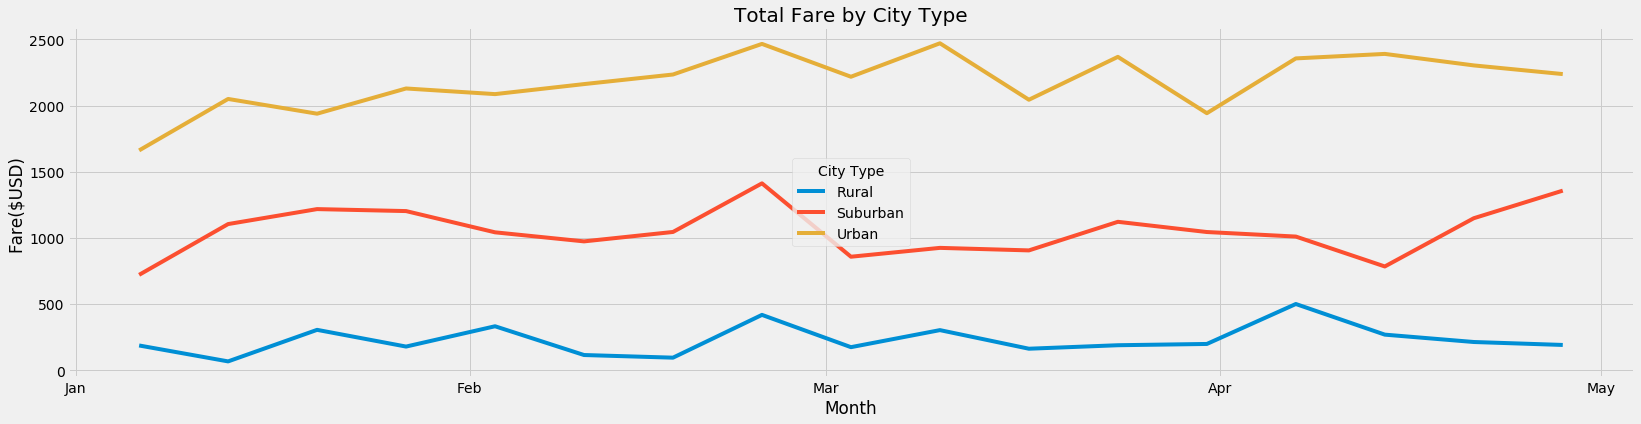

In [41]:
#Creation of a Multiple-Line Plot for the Sum of the Fares of Each City Type


fig, ax = plt.subplots(figsize=(25,6))
ax.plot(fares_jan_apr)
style.use('fivethirtyeight')
types = ["Rural","Suburban","Urban"]
ax.set_title("Total Fare by City Type", fontsize = 20)
ax.set_ylabel("Fare($USD)")
ax.set_xlabel("Month")
ax.legend(labels=types,loc="center", mode="Expanded",scatterpoints=1, title="City Type")

#Setting X ticks to be monthly
locator = mpl.dates.MonthLocator()
fmt = mpl.dates.DateFormatter('%b')

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(fmt)

plt.savefig("analysis/ChallengePlot.png")

In [30]:
fares_jan_apr

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20
